In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 7 ##

## Random Sampling ##

In [3]:
united = Table.read_table('united.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


In [7]:
united.sample(100)

Date,Flight Number,Destination,Delay
8/20/15,1655,DEN,-4
6/29/15,1946,BOS,4
8/29/15,1984,PDX,-5
7/29/15,1120,IAH,2
8/24/15,708,BOS,-3
7/14/15,522,PDX,5
7/23/15,205,PDX,77
7/29/15,1670,HNL,0
6/29/15,1721,KOA,4
6/29/15,1743,LAX,-4


## Large Random Samples ##

In [100]:
united 

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


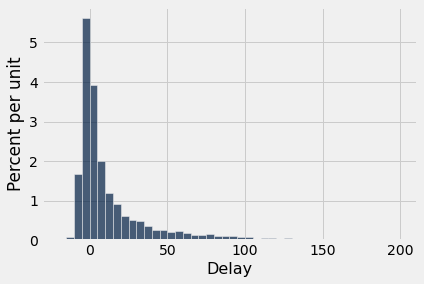

In [101]:
# Population Distribution
united_bins = np.arange(-20, 201, 5)
united.hist('Delay', bins = united_bins)

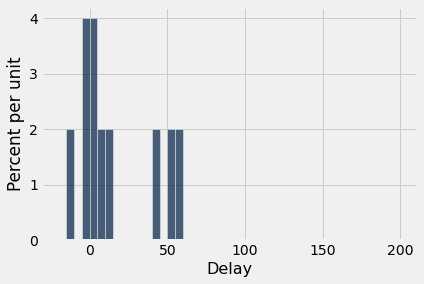

In [103]:
# (Sample) Empirical Distribution
united.sample(10).hist('Delay', bins = united_bins)

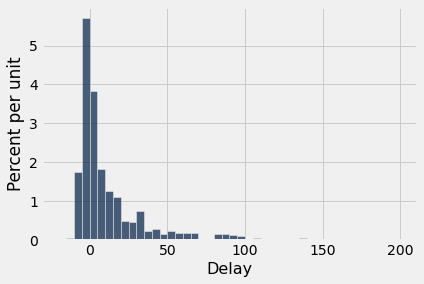

In [104]:
# (Sample) Empirical Distribution
united.sample(1000).hist('Delay', bins = united_bins)

## Simulating Statistics ##

In [105]:
# (Population) parameter # Usually unknown 
np.median(united.column('Delay'))

2.0

In [107]:
# (Sample) Statistic
np.median(united.sample(10).column('Delay'))

-2.0

In [108]:
def sample_median(size):
    return np.median(united.sample(size).column('Delay'))

In [109]:
sample_median(10)

-1.0

In [110]:
sample_median(100)

4.5

In [112]:
sample_medians = make_array()

for i in np.arange(1000):
    new_median = sample_median(10)
    sample_medians = np.append(sample_medians, new_median)

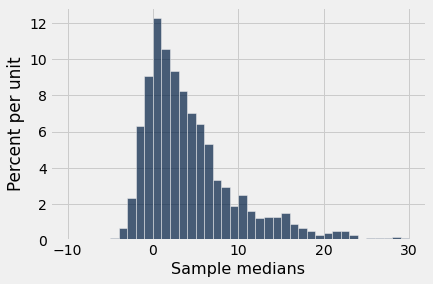

In [113]:
Table().with_column('Sample medians', sample_medians).hist(bins = np.arange(-10,31))

In [114]:
sample_medians = make_array()

for i in np.arange(1000):
    new_median = sample_median(1000)
    sample_medians = np.append(sample_medians, new_median)

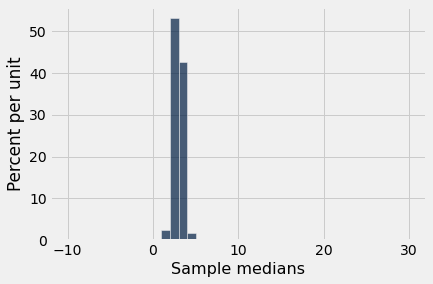

In [115]:
Table().with_column(
    'Sample medians', sample_medians).hist(bins = np.arange(-10,31))

## Alameda County Jury Panels ##

In [60]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian', 'Black', 'Latino', 'White', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.12, 0.54, 0.01),
    'Panels', make_array(0.26, 0.08, 0.08, 0.54, 0.04)
)

jury

Ethnicity,Eligible,Panels
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


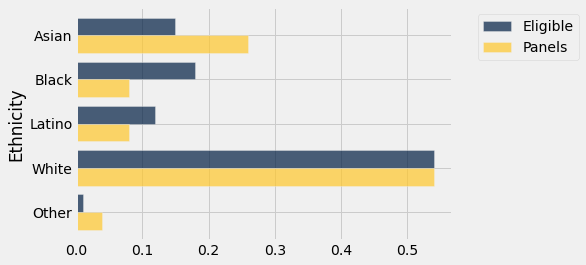

In [127]:
jury.barh('Ethnicity')

In [128]:
# Under the model, this is the true distribution of people
# from which the jurors are randomly sampled
model = make_array(0.15, 0.18, 0.12, 0.54, 0.01)

In [71]:
# Let's simulate a random draw of 1423 jurors from this distribution
simulated = sample_proportions(1423, model)
simulated

array([0.1658468 , 0.17427969, 0.11243851, 0.53759663, 0.00983837])

In [129]:
# The actual observed distribution (Panels) looks quite different
# from the simulation -- try running this several times to confirm!
jury_with_simulated = jury.with_column('Simulated', simulated)
jury_with_simulated

Ethnicity,Eligible,Panels,Simulated
Asian,0.15,0.26,0.165847
Black,0.18,0.08,0.17428
Latino,0.12,0.08,0.112439
White,0.54,0.54,0.537597
Other,0.01,0.04,0.00983837


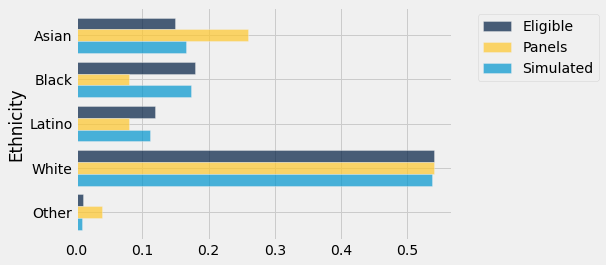

In [130]:
jury_with_simulated.barh('Ethnicity')

## Distance Between Distributions

In [70]:
# In this case, we need to understand how each of the 5 categories
# differ from their expected values according to the model.

diffs = jury.column('Panels') - jury.column('Eligible')
jury_with_difference = jury.with_column('Difference', diffs)
jury_with_difference

Ethnicity,Eligible,Panels,Difference
Asian,0.15,0.26,0.11
Black,0.18,0.08,-0.1
Latino,0.12,0.08,-0.04
White,0.54,0.54,0
Other,0.01,0.04,0.03


In [132]:
sum(abs(jury_with_difference.column("Difference")))/2

0.14

## Total Variation Distance

In [75]:
def tvd(dist1, dist2):
    return sum(abs(dist1 - dist2))/2

In [133]:
# The TVD of our observed data (Panels) from their expected values
# assuming the model is true (Eligbible)
obsvd_tvd = tvd(jury.column('Panels'), jury.column('Eligible'))
obsvd_tvd

0.14

In [77]:
# The TVD of a model simluation from its expected values
tvd(sample_proportions(1423, model), jury.column('Eligible'))

0.02234012649332397

In [134]:
def simulated_tvd():
    return tvd(sample_proportions(1423, model), model)

tvds = make_array()

num_simulations = 10000
for i in np.arange(num_simulations):
    new_tvd = simulated_tvd()
    tvds = np.append(tvds, new_tvd)

Observed TVD: 0.14


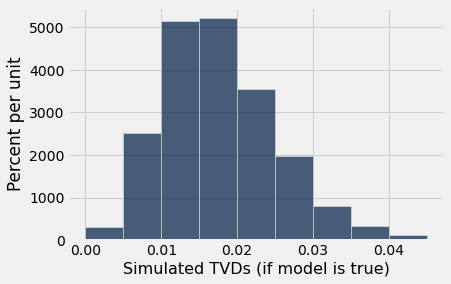

In [135]:
title = 'Simulated TVDs (if model is true)'
bins = np.arange(0, .05, .005)

Table().with_column(title, tvds).hist(bins = bins)
print('Observed TVD: ' + str(obsvd_tvd))